In [1]:
from sktime.utils.load_data import load_from_tsfile_to_dataframe
import time
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
sns.set(font_scale=1)
sns.set_style('whitegrid')

In [3]:
datasets = ['AtrialFibrillation',
            'Epilepsy']

In [4]:
def ts_df_to_array(ts_df, index):
    return np.array([ts_df.iloc[index].iloc[i].values for i in range(len(ts_df.iloc[0]))])

In [5]:
def ts_df_to_arrays(ts_df, swapaxes=False):
    arrays=[]
    for index in range(len(ts_df)):
        array = ts_df_to_array(ts_df, index)
        if swapaxes:
            arrays.append(np.swapaxes(array,0,1))
        else:
            arrays.append(array)
    return np.array(arrays)

In [6]:
def plot_multivariate_dataset_examples_with_seaborn(train_x, train_y, test_x, test_y, synthetic_x_train, synthetic_y_train, dataset_name, label):
    num_dimensions = train_x.shape[2]
    fig, ax = plt.subplots(nrows=num_dimensions, ncols=3, figsize=(12,2*num_dimensions), sharex=True, sharey=True)
    
    for data_index, (x, y) in enumerate(zip([train_x, synthetic_x_train, test_x], [train_y, synthetic_y_train, test_y])):
        label_data = x[y == label]
        label_indices = np.arange(len(label_data))
        random_index = np.random.choice(label_indices, size=1)
        random_example = label_data[random_index]
        for dimension_index in range(random_example.shape[2]):
            ax[dimension_index,data_index].plot(random_example[:,:,dimension_index][0])
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    
    cols = ["Train", "Synthetic", "Test"]
    rows = ['Dimension {}'.format(row) for row in range(1,num_dimensions+1)]

    for one_ax, col in zip(ax[0], cols):
        one_ax.set_title(col, size='large')

    for one_ax, row in zip(ax[:,0], rows):
        one_ax.set_ylabel(row)

    fig.text(0.5, 0.08, "Time", ha='center', size='large')
    
    fig.suptitle("Dataset: %s, Label: %s" % (dataset_name, label), fontsize=16, y=1)
    plt.show()

-----------
AtrialFibrillation
# replicates: 15
# dimensions: 2
length of series: 640
# classes: 3
total 'size': 19200


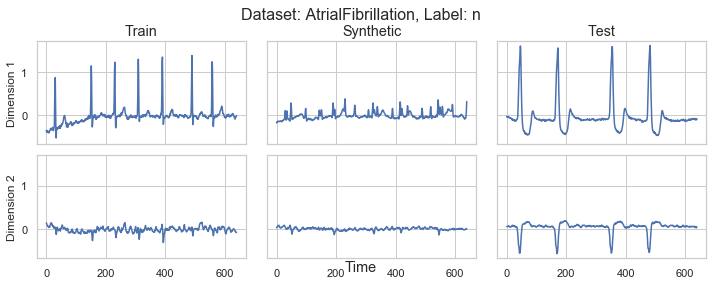

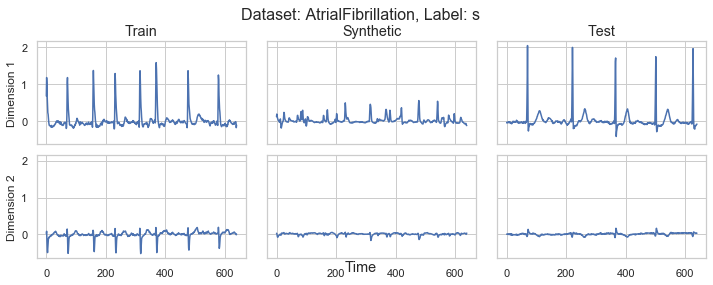

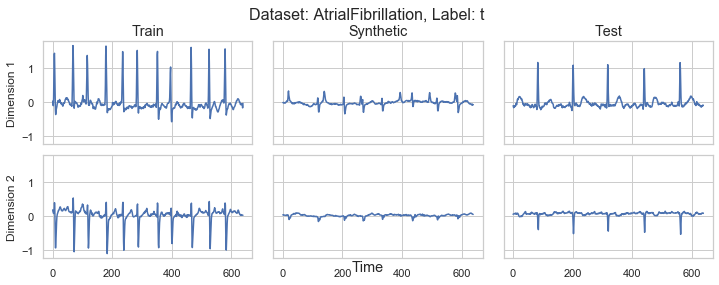

Time (s): 2.234375
-----------
-----------
Epilepsy
# replicates: 137
# dimensions: 3
length of series: 206
# classes: 4
total 'size': 84666


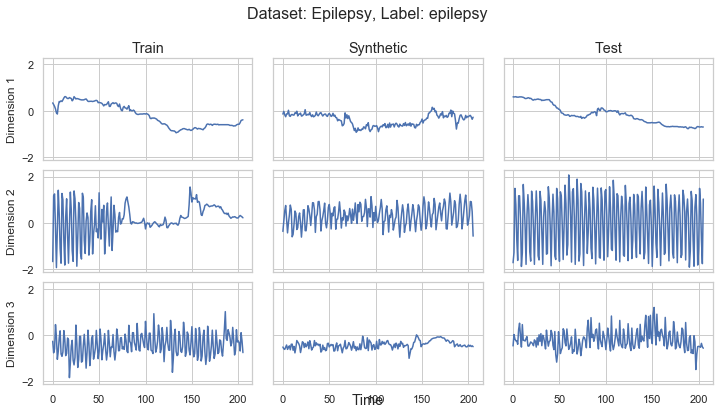

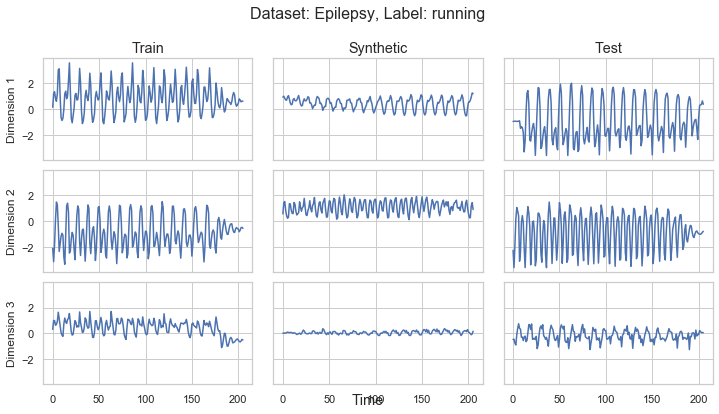

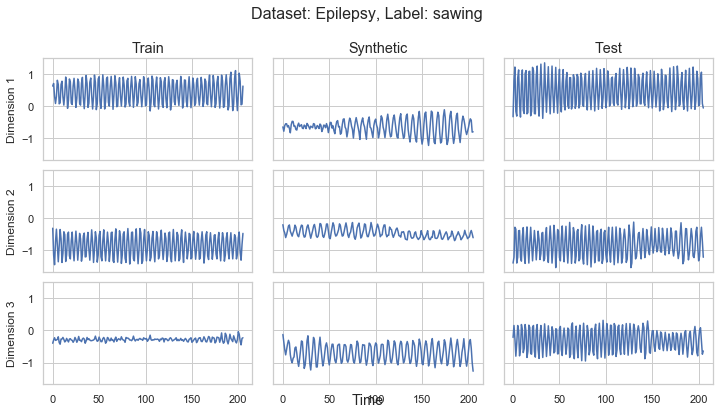

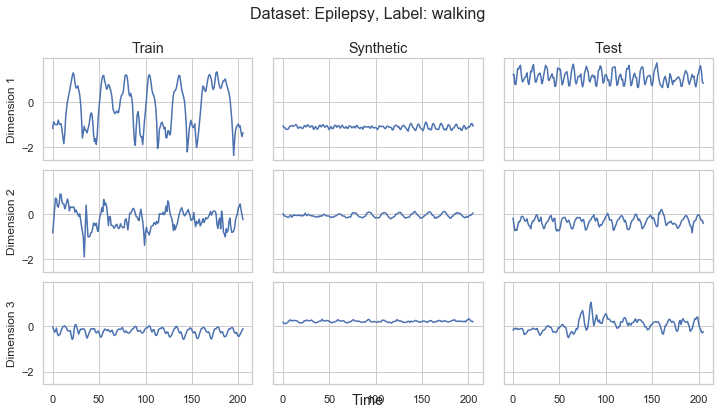

Time (s): 4.625000
-----------


In [7]:
for dataset_name in datasets:
    num_synthetic_ts = 1000
    dba_iters = 5
    limit_N = False

    print("-----------")
    start = time.process_time()
    print(dataset_name)
    train_x, train_y = load_from_tsfile_to_dataframe("../data/%s/%s_TRAIN.ts" % (dataset_name, dataset_name)) 
    test_x, test_y = load_from_tsfile_to_dataframe("../data/%s/%s_TEST.ts" % (dataset_name, dataset_name))
    
    train_x = ts_df_to_arrays(train_x, swapaxes=True)       
    test_x = ts_df_to_arrays(test_x, swapaxes=True)
    
    num_replicates = train_x.shape[0]
    print("# replicates: %d" % (num_replicates))
    num_dimensions = train_x.shape[2]
    print("# dimensions: %d" % (num_dimensions))
    len_series = train_x.shape[1]
    print("length of series: %d" % (len_series))
    num_classes = len(np.unique(train_y))
    print("# classes: %d" % (num_classes))
    total_size = num_replicates*num_dimensions*len_series
    print("total 'size': %d" % (total_size))

    synthetic_x_train = pickle.load(open("../syntheticdata/%s_softdtw_synthetic_x_train_%d_%d_%s.pkl" % (dataset_name, num_synthetic_ts, dba_iters, str(limit_N)), 'rb'))
    synthetic_y_train = pickle.load(open("../syntheticdata/%s_softdtw_synthetic_y_train_%d_%d_%s.pkl" % (dataset_name, num_synthetic_ts, dba_iters, str(limit_N)), 'rb'))
       
    labels = np.unique(train_y)
    for label in labels:
        plot_multivariate_dataset_examples_with_seaborn(train_x, train_y, test_x, test_y, synthetic_x_train, synthetic_y_train, dataset_name, label)

    print("Time (s): %f" % (time.process_time() - start))
    print("-----------")